# Exploratory Analysis of Real Commodities Data

## Currency Basket

We choose the returns of three currencies which are heavily linked to the performance of commodities marketsin order to create a market benchmark against which to compare the performance of each commodity. To this end, we consider the average of the returns of the Canadian Dollar (CAD), Australian Dollar (AUD), and the Mexican Peso when paired with the US Dollar (USD). The resulting augmented "commodities currency basket" series is analysed in this section.

In [80]:
import pandas as pd
from plotting_functions import series_plot

In [87]:
# Define list of currency names to use for dictionary creation
currencies_list = ['CME Mexican Peso',
                   'CME Australian Dollar AUD',
                   'CME Canadian Dollar CAD']

# Create dictionary of empty dataframes
currencies_dict = {str(currency) : pd.DataFrame([], 
                                                index = pd.bdate_range(start='1/1/1980', 
                                                                       end='7/31/2020')) for currency in currencies_list}

# Fill dataframes with continuous currency series
for currency in currencies_dict:
    
    current_df = pd.read_csv("Data/Continuous Futures Series/{}.csv".format(currency), index_col=0, skiprows=0, skipfooter=1, header=1, engine='python')
    current_df.index = pd.to_datetime(current_df.index)
    
    currencies_dict[currency] = currencies_dict[currency].join(current_df)

No handles with labels found to put in legend.


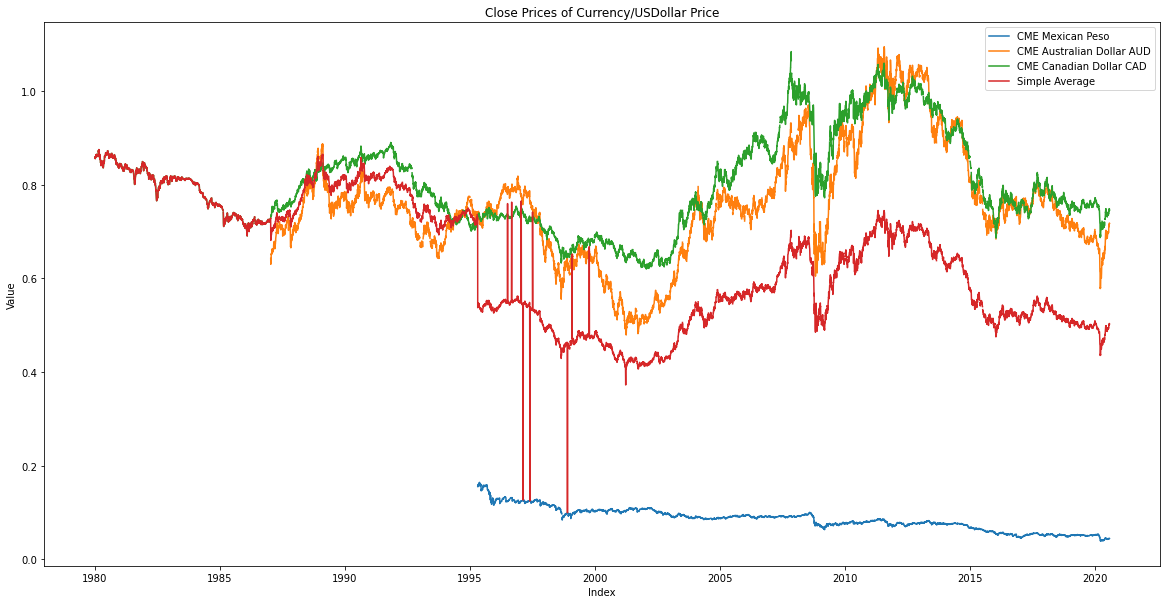

In [92]:
from plotting_functions import series_plot
# Currency close price dataframe
currencies_close_df = pd.DataFrame([], index=currencies_dict['CME Mexican Peso']['Close'].index)

# Loop through list of currencies and append their close price series to the large dataframe
for currency in currencies_list:
    currencies_close_df[currency] = currencies_dict[currency]['Close']

# Add simple average column
currencies_close_df['Simple Average'] = currencies_close_df.mean(axis=1)

# Plot the closing prices for each currency over the full index
series_plot(currencies_close_df, 'Close Prices of Currency/USDollar Price', legend=True)

### Normality

We wish to evaluate how closely the returns of the currencies follow a mean-zero normal distribution, in order to ensure our model reflects the reality of the data as much as possible.

## Commodities

In [ ]:
# Define list of currency names to use for dictionary creation
currencies_list = ['CME Mexican Peso',
                   'CME Australian Dollar AUD',
                   'CME Canadian Dollar CAD']

# Create dictionary of empty dataframes
currencies_dict = {str(currency) : pd.DataFrame([], 
                                                index = pd.bdate_range(start='1/1/1980', 
                                                                       end='7/31/2020')) for currency in currencies_list}

# Fill dataframes with continuous currency series
for currency in currencies_dict:
    
    current_df = pd.read_csv("Data/Continuous Futures Series/{}.csv".format(currency), index_col=0, skiprows=0, skipfooter=1, header=1, engine='python')
    current_df.index = pd.to_datetime(current_df.index)
    
    currencies_dict[currency] = currencies_dict[currency].join(current_df)